In [145]:
import numpy as np
import pandas as pd
import sklearn

In [146]:
data = pd.read_csv("California_Fire_Incidents.csv")
data.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [147]:
data.shape

(1636, 40)

1. В наборе данных 1636 объектов и 40 признаков.



In [148]:
data.dtypes

AcresBurned             float64
Active                     bool
AdminUnit                object
AirTankers              float64
ArchiveYear               int64
CalFireIncident            bool
CanonicalUrl             object
ConditionStatement       object
ControlStatement         object
Counties                 object
CountyIds                object
CrewsInvolved           float64
Dozers                  float64
Engines                 float64
Extinguished             object
Fatalities              float64
Featured                   bool
Final                      bool
FuelType                 object
Helicopters             float64
Injuries                float64
Latitude                float64
Location                 object
Longitude               float64
MajorIncident              bool
Name                     object
PercentContained        float64
PersonnelInvolved       float64
Public                     bool
SearchDescription        object
SearchKeywords           object
Started 

2. В наборе данных 16 категориальных признаков: 'AdminUnit', 'CanonicalUrl', 'ConditionStatement', 'ControlStatement', 'Counties', 'CountyIds', 'Extinguished', 'FuelType', 'Location', 'Name', 'SearchDescription', 'SearchKeywords', 'Started', 'Status', 'UniqueId', 'Updated'.

   

In [149]:
categorical = data.select_dtypes(include=['object', 'category']) #категориальные признаки
max_categorical = categorical.apply(lambda x: x.nunique(), axis=0).idxmax() #столбец с максимальным количеством
                                                                   #уникальных значений категориального признака
print(max_categorical)

UniqueId


3. Столбец с максимальным количеством уникальных значений категориального признака: 'UniqieId'.



In [150]:
binary = [col for col in data.columns if data[col].nunique() == 2] #бинарные признаки
print(binary)

['CalFireIncident', 'Featured', 'Final', 'MajorIncident', 'Status']


In [151]:
typebool = data.select_dtypes(include=['bool'])
typebool.head()

,Active,CalFireIncident,Featured,Final,MajorIncident,Public
0,False,True,False,True,False,True
1,False,True,False,True,False,True
2,False,True,False,True,False,True
3,False,False,False,True,False,True
4,False,True,False,True,True,True


4. Бинарные признаки: 'Active', 'CalFireIncident', 'Featured', 'Final', 'MajorIncident', 'Status'



In [152]:
numeric = data.select_dtypes(include=['int', 'float']) #числовые признаки
print(numeric.columns)

Index(['AcresBurned', 'AirTankers', 'ArchiveYear', 'CrewsInvolved', 'Dozers',
       'Engines', 'Fatalities', 'Helicopters', 'Injuries', 'Latitude',
       'Longitude', 'PercentContained', 'PersonnelInvolved',
       'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated',
       'StructuresThreatened', 'WaterTenders'],
      dtype='object')


5. Числовые признаки: 'AcresBurned', 'AirTankers', 'ArchiveYear', 'CrewsInvolved', 'Dozers', 'Engines', 'Fatalities', 'Helicopters', 'Injuries', 'Latitude', 'Longitude', 'PercentContained', 'PersonnelInvolved', 'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened', 'WaterTenders'.



In [153]:
data.isna().sum()

AcresBurned                3
Active                     0
AdminUnit                  0
AirTankers              1608
ArchiveYear                0
CalFireIncident            0
CanonicalUrl               0
ConditionStatement      1352
ControlStatement        1531
Counties                   0
CountyIds                  0
CrewsInvolved           1465
Dozers                  1513
Engines                 1445
Extinguished              59
Fatalities              1615
Featured                   0
Final                      0
FuelType                1624
Helicopters             1552
Injuries                1516
Latitude                   0
Location                   0
Longitude                  0
MajorIncident              0
Name                       0
PercentContained           3
PersonnelInvolved       1432
Public                     0
SearchDescription         17
SearchKeywords           203
Started                    0
Status                     0
StructuresDamaged       1569
StructuresDest

6. В наборе данных есть пропуски.



In [154]:
missingvalues = data.isnull().any(axis=1)
countmissingvalues = missingvalues.sum() #считаем количество пропусков
print(countmissingvalues)

1636


7. В наборе данных 1636 объектов с пропусками.



8. Столбец с максимальным количеством пропусков: 'StructuresEvacuated' (1636 пропусков).


In [155]:
data.describe()

,AcresBurned,AirTankers,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
count,1633.000000,28.000000,1636.000000,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1636.000000,1636.000000,1633.0,204.000000,67.000000,175.000000,0.0,30.000000,146.000000
mean,4589.443968,4.071429,2016.608802,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.203975,-108.082642,100.0,328.553922,67.970149,271.788571,NaN,522.800000,7.815068
std,27266.337722,6.399818,1.845340,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.401380,37.006927,0.0,521.138789,155.771975,1557.255963,NaN,739.586856,12.719251
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,100.0,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,35.000000,2.000000,2015.000000,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.165891,-121.768358,100.0,55.000000,1.000000,1.000000,NaN,0.000000,2.000000
50%,100.000000,2.000000,2017.000000,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.104065,-120.461560,100.0,151.500000,6.000000,7.000000,NaN,45.000000,4.000000
75%,422.000000,4.000000,2018.000000,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.086808,-117.474073,100.0,350.000000,49.500000,41.500000,NaN,1043.750000,6.000000
max,410203.000000,27.000000,2019.000000,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,100.0,3100.000000,783.000000,18804.000000,NaN,2600.000000,79.000000


9. Можем заметить, что практически во всех столбцах максимальное значение сильно отличается от среднего и стандартное отклонение довольно высокое. Делаем вывод, что в наборе данных есть выбросы.

    

In [156]:
#Будем проверять числовые признаки на аномальные значения с помощью z-оценки. Для этого найдем z-оценку для каждого элемента в наборе данных 
#(по формуле: (наблдюдаемое значение - среднее значение)/стандартное отклонение). Далее установим порог для выявления аномального значения - 3
#и выведем их

# Вычисление средних значений и стандартных отклонений для каждого столбца
means = numeric.mean()
stds = numeric.std()

# Вычисление Z-оценок для каждого элемента в наборе данных
z_scores = (numeric - means) / stds

# Установка порогового значения для определения аномалий
threshold = 3

# Поиск аномальных значений
anomalies = np.abs(z_scores) > threshold

# Вывод аномальных значений для каждого столбца
for col in numeric.columns:
    print(f'Аномальные значения в столбце {col}:')
    print(numeric.loc[anomalies[col], col])


Аномальные значения в столбце AcresBurned:
0       257314.0
162      97717.0
279     151623.0
431     132127.0
616     281893.0
617     281893.0
1054    410203.0
1055    410203.0
1056    410203.0
1057    410203.0
1058    229651.0
1059    229651.0
1060    153336.0
1061     96949.0
1062     96949.0
1063     96901.0
1064     90288.0
1065     90288.0
Name: AcresBurned, dtype: float64
Аномальные значения в столбце AirTankers:
18    25.0
25    27.0
Name: AirTankers, dtype: float64
Аномальные значения в столбце ArchiveYear:
Series([], Name: ArchiveYear, dtype: int64)
Аномальные значения в столбце CrewsInvolved:
6       63.0
11      56.0
202     82.0
1068    58.0
1069    58.0
1070    58.0
Name: CrewsInvolved, dtype: float64
Аномальные значения в столбце Dozers:
1068    76.0
1069    76.0
1070    76.0
Name: Dozers, dtype: float64
Аномальные значения в столбце Engines:
6       201.0
11      183.0
1068    256.0
1069    256.0
1070    256.0
Name: Engines, dtype: float64
Аномальные значения в столбце

Как целевой признак выделим признак 'MajorIncident' (считается ли происшествие серьезным) - далее будем предсказывать по остальным признакам относится ли происшествие к MajorIncident (или, другими словами, является ли оно серьезным). 

In [158]:
y = data['MajorIncident']
data = data.drop(columns = ['MajorIncident'])

11. Столбец с целевым признаком: 'MajorIncident'.



Для дальнейшей работы с датасетом выполним предобработку данных.

Как выяснилось в пунктах 6-8, в наборе данных есть значения типа NAN - будем от них избавляться. Удалим столбцы с большим количеством пропущенных значений (1300 > ) - они не имеют никакого смысла; оставшиеся столбцы с пропущенными значениями заполним следующим образом: значения NAN в столбах числового типа - средним арифметическим по столбцу, в столбцах строкогового типа - пустыми значениями. 

In [159]:
import pandas as pd

#столбцы, в которых более 1300 значений типа NAN:
#['AirTankers', 'ConditionStatement', 'ControlStatement', 'CrewsInvolved', 'Dozers', 'Engines', 'Fatalities', 'FuelType','Helicopters',
#'Injuries', 'PersonnelInvolved', 'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened', 'WaterTenders']

data2 = data.drop(columns = ['AirTankers', 'ConditionStatement', 'ControlStatement', 'CrewsInvolved', 'Dozers', 'Engines', 'Fatalities', 'FuelType',
                   'Helicopters', 'Injuries', 'PersonnelInvolved', 'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated',
                   'StructuresThreatened', 'WaterTenders'], axis = 1)

In [160]:
#значения типа NAN в столбцах числового типа заменим на среднее арифметическое по столбцу
data2['AcresBurned'] = data2['AcresBurned'].fillna(data2['AcresBurned'].mean())
data2['PercentContained'] = data2['PercentContained'].fillna(data2['PercentContained'].mean())

In [161]:
#значения типа NAN в столбцах строкового типа заменим на пустое значение
data2['Extinguished'] = data2['Extinguished'].fillna('')
data2['SearchKeywords'] = data2['SearchKeywords'].fillna('')
data2['SearchDescription'] = data2['SearchDescription'].fillna('')

In [162]:
data2.isna().sum()

AcresBurned          0
Active               0
AdminUnit            0
ArchiveYear          0
CalFireIncident      0
CanonicalUrl         0
Counties             0
CountyIds            0
Extinguished         0
Featured             0
Final                0
Latitude             0
Location             0
Longitude            0
Name                 0
PercentContained     0
Public               0
SearchDescription    0
SearchKeywords       0
Started              0
Status               0
UniqueId             0
Updated              0
dtype: int64

Мы избавились от пропусков.



Обработаем и нормализуем числовые признаки.

In [165]:
data2numeric = data2.select_dtypes(include=['int', 'float'])
data2numeric

,AcresBurned,ArchiveYear,Latitude,Longitude,PercentContained
0,257314.000000,2013,37.857000,-120.086000,100.0
1,30274.000000,2013,34.585595,-118.423176,100.0
2,27531.000000,2013,33.709500,-116.728850,100.0
3,27440.000000,2013,39.120000,-120.650000,100.0
4,24251.000000,2013,0.000000,0.000000,100.0
...,...,...,...,...,...
1631,9.000000,2019,33.827979,-117.499619,100.0
1632,2.000000,2019,39.409722,-121.000556,100.0
1633,4589.443968,2019,38.734634,-121.729691,100.0
1634,4589.443968,2019,33.351145,-117.403719,100.0


Можем заметить, что PercentContained - константный признак, поэтому удалим его из набора данных.

In [166]:
data2numeric = data2numeric.drop(columns = 'PercentContained')

In [167]:
#нормализация
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
data2numeric = pd.DataFrame(norm.fit_transform(data2numeric), columns = data2numeric.columns)

data2numeric.describe()

,AcresBurned,ArchiveYear,Latitude,Longitude
count,1.636000e+03,1.636000e+03,1.636000e+03,1.636000e+03
mean,-3.474537e-17,9.589721e-15,-2.958785e-17,-2.258449e-16
std,1.000306e+00,1.000306e+00,1.000306e+00,1.000306e+00
min,-1.685252e-01,-1.956228e+00,-1.163283e+00,-4.355556e-01
25%,-1.672400e-01,-8.720852e-01,-2.244448e-02,-3.699280e-01
50%,-1.648532e-01,2.120572e-01,-7.381073e-04,-3.346050e-01
75%,-1.528549e-01,7.541284e-01,1.390982e-02,-2.538525e-01
max,1.489420e+01,1.296200e+00,4.026150e+01,6.135615e+00


10. Значит, 'ArchiveYear' - столбец с максимальным средним значением после нормировки признаков через стандартное отклонение.



In [168]:
#Обработаем выбросы в числовых признаках с помощью межквартильного диапазона

In [199]:
Q1 = data2numeric.quantile(0.25)
Q3 = data2numeric.quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов
outliers = (data2numeric < (Q1 - 1.5 * IQR)) | (data2numeric > (Q3 + 1.5 * IQR))
numeric_no_outliers = data2numeric[~outliers.any(axis=1)]

# Результат без выбросов
print(numeric_no_outliers.head())


    AcresBurned  ArchiveYear  Latitude  Longitude
28    -0.139369    -1.956228 -0.011059  -0.283962
29    -0.142380    -1.956228 -0.017154  -0.292920
30    -0.142380    -1.956228 -0.020039  -0.284558
31    -0.146052    -1.956228 -0.016997  -0.293311
32    -0.147521    -1.956228  0.011599  -0.330184


Теперь обработаем и закодируем категориальные признаки.

In [170]:
data2categorical = data2.select_dtypes(include=['object'])
data2categorical

,AdminUnit,CanonicalUrl,Counties,CountyIds,Extinguished,Location,Name,SearchDescription,SearchKeywords,Started,Status,UniqueId,Updated
0,Stanislaus National Forest/Yosemite National Park,/incidents/2013/8/17/rim-fire/,Tuolumne,55,2013-09-06T18:30:00Z,3 miles east of Groveland along Hwy 120,Rim Fire,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z
1,USFS Angeles National Forest/Los Angeles Count...,/incidents/2013/5/30/powerhouse-fire/,Los Angeles,19,2013-06-08T18:30:00Z,Angeles National Forest,Powerhouse Fire,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z
2,CAL FIRE Riverside Unit / San Bernardino Natio...,/incidents/2013/7/15/mountain-fire/,Riverside,33,2013-07-30T18:00:00Z,Hwy 243 & Hwy 74 near Mountain Center,Mountain Fire,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z
3,Tahoe National Forest,/incidents/2013/8/10/american-fire/,Placer,31,2013-08-30T08:00:00Z,"Deadwood Ridge, northeast of Foresthill",American Fire,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z
4,Ventura County Fire/CAL FIRE,/incidents/2013/5/2/springs-fire/,Ventura,56,2013-05-11T06:30:00Z,Southbound Highway 101 at Camarillo Springs Ro...,Springs Fire,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,CAL FIRE / Riverside County Fire,/incidents/2019/10/10/eagle-fire/,Riverside,33,2019-10-10T18:11:00Z,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",Eagle Fire,"The Eagle Fire started on October 10, 2019 nea...",,2019-10-10T12:08:00Z,Finalized,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z
1632,CAL FIRE Nevada-Yuba-Placer Unit,/incidents/2019/6/28/long-fire/,Nevada,29,2019-06-28T17:33:00Z,"Off of Long Point Road and Old Mill Road, Sou...",Long Fire,"Long Fire started on June 28, 2019 off of Long...",,2019-06-28T15:03:04Z,Finalized,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z
1633,Yolo County Fire Protection District,/incidents/2019/11/25/cashe-fire/,Yolo,57,,"County Road 102 and County Road 17, North of W...",Cashe Fire,"The Cashe Fire started November 25, 2019 off C...",,2019-11-25T12:02:02Z,Finalized,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z
1634,Camp Pendleton Marine Corps Base,/incidents/2019/10/22/oak-fire/,San Diego,37,,"Near Basilone Road and Las Pulgas Road, near C...",Oak Fire,"The Oak Fire started October 22, 2019 off near...",,2019-10-22T19:20:44Z,Finalized,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z


Можем заметить, что в наборе данных много признаков, в которых практически каждое значение уникально.
Пройдемся по каждому признаку и проверим сколько в нем уникальных значений. В случае, если их очень много - удалим признак из набора данных.

In [171]:
for col in data2categorical.columns:
    print(data2categorical[col].value_counts(ascending=True), "\n")

AdminUnit
Stanislaus National Forest/Yosemite National Park                                                                                        1
Kings County Fire Department                                                                                                             1
Hoopa Valley Tribe                                                                                                                       1
Suisun Fire Protection District                                                                                                          1
Unified Command: CAL FIRE, Ventura County Fire, Ventura Sheriff Dept, LA County Fire, LA City Fire, LA Sherriff Dept, LA Police Dept     1
                                                                                                                                        ..
CAL FIRE San Luis Obispo Unit                                                                                                           45
CAL FIRE Shasta-T

Будем исключать следующие признаки категориального типа: CanonicalUrl (1607 уникальных значений), Extinguished (1039 уникальных значений), Location (1606 уникальных значений), Name (1193 уникальных значения), SearchDescription (1592 уникальных значения), SearchKeywords (1383 уникальных значения), Started (1597 уникальных значений), Status (1634 уникальных значения), UniqueId (1609 уникальных значений), Updated (1134 уникальнвх значения).

In [172]:
data2categorical = data2categorical.drop(['CanonicalUrl', 'Extinguished', 'Location', 'Name', 'SearchDescription', 
                                          'SearchKeywords','Started', 'Status', 'UniqueId', 'Updated'], axis = 1)

In [173]:
#dummy-кодирование категориальных признаков
dummydata2categorical = pd.get_dummies(data2categorical, columns = ['AdminUnit', 'Counties', 'CountyIds'], drop_first=True)
dummydata2categorical.head()

,AdminUnit_ East Contra Costa County Fire Protection District,AdminUnit_ Los Angeles Fire Department,AdminUnit_ San Diego Fire-Rescue Department,AdminUnit_ Shasta-Trinity National Forest,"AdminUnit_**This is no longer a CAL FIRE incident. At 6 pm on Thursday, June 04, BIA took over management of the fire**",AdminUnit_**This was NOT a CAL FIRE Incident. Click this link for more information from the US Forest Service,AdminUnit_Alameda County Fire,AdminUnit_Angeles National Forest,AdminUnit_Angeles National Forest,AdminUnit_Angeles National Forest / Los Angeles County Fire Department,...,"CountyIds_6,11,17,23","CountyIds_6,17,23",CountyIds_61,CountyIds_62,"CountyIds_62,37",CountyIds_7,CountyIds_8,CountyIds_9,"CountyIds_9,31","CountyIds_9,34"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Теперь преобразуем закодированные категориальные признаки в данные типа int, чтоб далее мы могли с ними работать.

In [174]:
dummydata2categorical_int = dummydata2categorical.astype(int)

Обработаем бинарные признаки и преобразуем их в данные типа int, чтоб далее с ними можно было работать.

In [175]:
data2binary = data2.select_dtypes(include=['bool'])
data2binary

,Active,CalFireIncident,Featured,Final,Public
0,False,True,False,True,True
1,False,True,False,True,True
2,False,True,False,True,True
3,False,False,False,True,True
4,False,True,False,True,True
...,...,...,...,...,...
1631,False,True,False,True,True
1632,False,True,False,True,True
1633,False,False,False,True,True
1634,False,False,False,True,True


In [176]:
for col in data2binary.columns:
    print(data2binary[col].value_counts(ascending=True), "\n")

Active
False    1636
Name: count, dtype: int64 

CalFireIncident
False     385
True     1251
Name: count, dtype: int64 

Featured
True       26
False    1610
Name: count, dtype: int64 

Final
False       2
True     1634
Name: count, dtype: int64 

Public
True    1636
Name: count, dtype: int64 



Видим, что бинарные признаки 'Active' и 'Public' константные, поэтому их удаляем. Аналогично поступаем с признаками 'Final' и 'Featured', т.к смысловой нагрузки в себе он не несут (в признаке Final почти все значения 'True', в признаке Featured - 'False')

In [177]:
data2binary = data2binary.drop(['Public', 'Active', 'Final', 'Featured'], axis=1)

Преобразуем оставшийся бинарный признак в признак типа int.

In [178]:
data2binary_int = data2binary.astype(int)

Объединим все признаки в один набор данных.

In [179]:
data3 = pd.concat([data2numeric, dummydata2categorical_int, data2binary_int], axis = 1)

In [180]:
data3

,AcresBurned,ArchiveYear,Latitude,Longitude,AdminUnit_ East Contra Costa County Fire Protection District,AdminUnit_ Los Angeles Fire Department,AdminUnit_ San Diego Fire-Rescue Department,AdminUnit_ Shasta-Trinity National Forest,"AdminUnit_**This is no longer a CAL FIRE incident. At 6 pm on Thursday, June 04, BIA took over management of the fire**",AdminUnit_**This was NOT a CAL FIRE Incident. Click this link for more information from the US Forest Service,...,"CountyIds_6,17,23",CountyIds_61,CountyIds_62,"CountyIds_62,37",CountyIds_7,CountyIds_8,CountyIds_9,"CountyIds_9,31","CountyIds_9,34",CalFireIncident
0,9.280090e+00,-1.956228,0.004824,-0.324454,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9.431414e-01,-1.956228,-0.019344,-0.279507,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.424180e-01,-1.956228,-0.025816,-0.233709,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8.390765e-01,-1.956228,0.014155,-0.339699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.219758e-01,-1.956228,-0.274852,2.921499,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,-1.681947e-01,1.296200,-0.024941,-0.254543,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1632,-1.684518e-01,1.296200,0.016295,-0.349174,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1633,-3.339681e-17,1.296200,0.011308,-0.368883,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1634,-3.339681e-17,1.296200,-0.028464,-0.251951,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Разделим набор данных на тестовую и обучащую выборку и определим, сколько объектов попадает в тренировочную выборку.

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data3, y, test_size=0.3, random_state=42)
X_train.shape

(1145, 634)

12. 1145 объектов.

    

Исследуем набор данных на линейную зависимость. Чтобы исследовать зависимость между признаками, выведем матрицу корреляции, показывающую коэффициенты корреляции между всеми парами признаков в наборе данных.

In [183]:
#матрица корреляции
correlation_matrix = data3.corr()
correlation_matrix

,AcresBurned,ArchiveYear,Latitude,Longitude,AdminUnit_ East Contra Costa County Fire Protection District,AdminUnit_ Los Angeles Fire Department,AdminUnit_ San Diego Fire-Rescue Department,AdminUnit_ Shasta-Trinity National Forest,"AdminUnit_**This is no longer a CAL FIRE incident. At 6 pm on Thursday, June 04, BIA took over management of the fire**",AdminUnit_**This was NOT a CAL FIRE Incident. Click this link for more information from the US Forest Service,...,"CountyIds_6,17,23",CountyIds_61,CountyIds_62,"CountyIds_62,37",CountyIds_7,CountyIds_8,CountyIds_9,"CountyIds_9,31","CountyIds_9,34",CalFireIncident
AcresBurned,1.000000,0.021684,-0.002146,-0.019492,-0.003986,-0.003491,-0.004077,-0.004134,-0.004095,-0.004043,...,0.069771,-0.002986,-0.002799,-0.005864,-0.020618,0.004036,-0.008131,0.001357,-0.005687,0.000311
ArchiveYear,0.021684,1.000000,0.013854,-0.302928,0.032056,0.032056,0.018650,0.005244,-0.021568,-0.021568,...,0.032323,0.032056,0.032056,0.045348,0.050877,-0.014541,-0.008592,-0.011546,-0.068440,-0.037969
Latitude,-0.002146,0.013854,1.000000,-0.078975,0.000144,-0.000567,-0.000750,0.000652,-0.006797,0.000520,...,0.000584,0.000882,-0.000846,-0.001201,0.000755,-0.004488,-0.002033,0.000456,0.000371,0.021362
Longitude,-0.019492,-0.302928,-0.078975,1.000000,-0.009064,-0.006950,-0.005977,-0.009510,0.072251,-0.008436,...,-0.017421,-0.009421,-0.005733,-0.008314,-0.048566,0.042844,-0.007614,-0.012156,-0.012295,-0.085456
AdminUnit_ East Contra Costa County Fire Protection District,-0.003986,0.032056,0.000144,-0.009064,1.000000,-0.000612,-0.000612,-0.000612,-0.000612,-0.000612,...,-0.001060,-0.000612,-0.000612,-0.000865,0.190914,-0.001500,-0.003603,-0.000865,-0.000865,-0.044580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CountyIds_8,0.004036,-0.014541,-0.004488,0.042844,-0.001500,-0.001500,-0.001500,-0.001500,-0.001500,-0.001500,...,-0.002600,-0.001500,-0.001500,-0.002123,-0.007859,1.000000,-0.008839,-0.002123,-0.002123,-0.085528
CountyIds_9,-0.008131,-0.008592,-0.002033,-0.007614,-0.003603,-0.003603,-0.003603,-0.003603,-0.003603,-0.003603,...,-0.006244,-0.003603,-0.003603,-0.005097,-0.018872,-0.008839,1.000000,-0.005097,-0.005097,-0.010088
"CountyIds_9,31",0.001357,-0.011546,0.000456,-0.012156,-0.000865,-0.000865,-0.000865,-0.000865,-0.000865,-0.000865,...,-0.001500,-0.000865,-0.000865,-0.001224,-0.004532,-0.002123,-0.005097,1.000000,-0.001224,0.019408
"CountyIds_9,34",-0.005687,-0.068440,0.000371,-0.012295,-0.000865,-0.000865,-0.000865,-0.000865,-0.000865,-0.000865,...,-0.001500,-0.000865,-0.000865,-0.001224,-0.004532,-0.002123,-0.005097,-0.001224,1.000000,0.019408


In [184]:
#выведем все парные зависимости, для которых коэффициент корреляции по модулю больше, чем 0.5
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"Признаки {correlation_matrix.columns[i]} и {correlation_matrix.columns[j]} имеют коэффициент корреляции {correlation_matrix.iloc[i, j]}")

Признаки AcresBurned и AdminUnit_USFS Mendocino National Forest  имеют коэффициент корреляции 0.6579615191022608
Признаки AcresBurned и CountyIds_6,11,17,23 имеют коэффициент корреляции 0.7373728492949467
Признаки AdminUnit_CAL FIRE / Riverside County Fire и Counties_Riverside имеют коэффициент корреляции 0.5121866929991643
Признаки AdminUnit_CAL FIRE / Riverside County Fire и CountyIds_33 имеют коэффициент корреляции 0.5141222568143671
Признаки AdminUnit_CAL FIRE / Sacramento Metropolitan Fire и CountyIds_9,34 имеют коэффициент корреляции 1.0
Признаки AdminUnit_CAL FIRE / USFS Los Padres National Forest и CountyIds_15,56 имеют коэффициент корреляции 1.0
Признаки AdminUnit_CAL FIRE Butte Unit и Counties_Butte имеют коэффициент корреляции 0.6776933130582825
Признаки AdminUnit_CAL FIRE Butte Unit и CountyIds_4 имеют коэффициент корреляции 0.6776933130582825
Признаки AdminUnit_CAL FIRE Fresno-Kings Unit и Counties_Fresno имеют коэффициент корреляции 0.6001806879428607
Признаки AdminUnit_C

In [185]:
#снова пройдемся по корреляционной матрице и выведем все парные зависимости, для которых коэффициент корреляции по модулю больше, чем 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            print(f"Признаки {correlation_matrix.columns[i]} и {correlation_matrix.columns[j]} имеют коэффициент корреляции {correlation_matrix.iloc[i, j]}")

Признаки AdminUnit_CAL FIRE / Sacramento Metropolitan Fire и CountyIds_9,34 имеют коэффициент корреляции 1.0
Признаки AdminUnit_CAL FIRE / USFS Los Padres National Forest и CountyIds_15,56 имеют коэффициент корреляции 1.0
Признаки AdminUnit_CAL FIRE Mendocino Unit и Counties_Mendocino имеют коэффициент корреляции 0.8847561329336323
Признаки AdminUnit_CAL FIRE Mendocino Unit и CountyIds_23 имеют коэффициент корреляции 0.9187256449014353
Признаки AdminUnit_CAL FIRE NEU и Counties_State of Nevada имеют коэффициент корреляции 1.0
Признаки AdminUnit_CAL FIRE NEU и CountyIds_59 имеют коэффициент корреляции 1.0
Признаки AdminUnit_CAL FIRE Nevada-Yuba-Placer Unit / El Dorado National Forest и CountyIds_9,31 имеют коэффициент корреляции 1.0
Признаки AdminUnit_CAL FIRE San Luis Obispo Unit и Counties_San Luis Obispo имеют коэффициент корреляции 0.8335035443181691
Признаки AdminUnit_CAL FIRE San Luis Obispo Unit и CountyIds_40 имеют коэффициент корреляции 0.8545678078514253
Признаки AdminUnit_CAL

13. Посмотрев на результат второго прохода циклом видим, что столбцы Counties и CountyIds сильно кореллируют -- id штата, поэтому удалим CountyIds из data2categorial. В таком случае снова выполним dummy-кодирование категориальных признаков, преобразуем их в числовые и создадим новый набор данных data4 без признака 'CountyIds'.

In [186]:
data2categorical = data2categorical.drop(['CountyIds'], axis = 1)
data2categorical

,AdminUnit,Counties
0,Stanislaus National Forest/Yosemite National Park,Tuolumne
1,USFS Angeles National Forest/Los Angeles Count...,Los Angeles
2,CAL FIRE Riverside Unit / San Bernardino Natio...,Riverside
3,Tahoe National Forest,Placer
4,Ventura County Fire/CAL FIRE,Ventura
...,...,...
1631,CAL FIRE / Riverside County Fire,Riverside
1632,CAL FIRE Nevada-Yuba-Placer Unit,Nevada
1633,Yolo County Fire Protection District,Yolo
1634,Camp Pendleton Marine Corps Base,San Diego


In [187]:
#dummy-кодирование категориальных признаков
dummy2data2categorical = pd.get_dummies(data2categorical, columns = ['AdminUnit', 'Counties'], drop_first=True)

#преобразование в числовые данные
dummy2data2categorical_int = dummy2data2categorical.astype(int)
dummy2data2categorical_int.head()

,AdminUnit_ East Contra Costa County Fire Protection District,AdminUnit_ Los Angeles Fire Department,AdminUnit_ San Diego Fire-Rescue Department,AdminUnit_ Shasta-Trinity National Forest,"AdminUnit_**This is no longer a CAL FIRE incident. At 6 pm on Thursday, June 04, BIA took over management of the fire**",AdminUnit_**This was NOT a CAL FIRE Incident. Click this link for more information from the US Forest Service,AdminUnit_Alameda County Fire,AdminUnit_Angeles National Forest,AdminUnit_Angeles National Forest,AdminUnit_Angeles National Forest / Los Angeles County Fire Department,...,Counties_State of Nevada,Counties_State of Oregon,Counties_Sutter,Counties_Tehama,Counties_Trinity,Counties_Tulare,Counties_Tuolumne,Counties_Ventura,Counties_Yolo,Counties_Yuba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [188]:
#набор данных без категориального признака 'CountyIds'
data4 = pd.concat([data2numeric, dummy2data2categorical_int, data2binary], axis = 1)
data4.head()

,AcresBurned,ArchiveYear,Latitude,Longitude,AdminUnit_ East Contra Costa County Fire Protection District,AdminUnit_ Los Angeles Fire Department,AdminUnit_ San Diego Fire-Rescue Department,AdminUnit_ Shasta-Trinity National Forest,"AdminUnit_**This is no longer a CAL FIRE incident. At 6 pm on Thursday, June 04, BIA took over management of the fire**",AdminUnit_**This was NOT a CAL FIRE Incident. Click this link for more information from the US Forest Service,...,Counties_State of Oregon,Counties_Sutter,Counties_Tehama,Counties_Trinity,Counties_Tulare,Counties_Tuolumne,Counties_Ventura,Counties_Yolo,Counties_Yuba,CalFireIncident
0,9.280090,-1.956228,0.004824,-0.324454,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,True
1,0.943141,-1.956228,-0.019344,-0.279507,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
2,0.842418,-1.956228,-0.025816,-0.233709,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,0.839076,-1.956228,0.014155,-0.339699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,0.721976,-1.956228,-0.274852,2.921499,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,True


In [189]:
#матрица корреляции для нового набора данных
correlation_matrix2 = data4.corr()
correlation_matrix2

,AcresBurned,ArchiveYear,Latitude,Longitude,AdminUnit_ East Contra Costa County Fire Protection District,AdminUnit_ Los Angeles Fire Department,AdminUnit_ San Diego Fire-Rescue Department,AdminUnit_ Shasta-Trinity National Forest,"AdminUnit_**This is no longer a CAL FIRE incident. At 6 pm on Thursday, June 04, BIA took over management of the fire**",AdminUnit_**This was NOT a CAL FIRE Incident. Click this link for more information from the US Forest Service,...,Counties_State of Oregon,Counties_Sutter,Counties_Tehama,Counties_Trinity,Counties_Tulare,Counties_Tuolumne,Counties_Ventura,Counties_Yolo,Counties_Yuba,CalFireIncident
AcresBurned,1.000000,0.021684,-0.002146,-0.019492,-0.003986,-0.003491,-0.004077,-0.004134,-0.004095,-0.004043,...,-0.002986,-0.005728,-0.023517,0.076700,-0.010296,0.038616,0.048618,0.015308,-0.012755,0.000311
ArchiveYear,0.021684,1.000000,0.013854,-0.302928,0.032056,0.032056,0.018650,0.005244,-0.021568,-0.021568,...,0.032056,0.024578,0.024692,-0.011141,0.035934,-0.041406,-0.015470,0.014345,0.016104,-0.037969
Latitude,-0.002146,0.013854,1.000000,-0.078975,0.000144,-0.000567,-0.000750,0.000652,-0.006797,0.000520,...,0.000882,0.000639,0.001775,-0.003659,-0.003371,0.000594,-0.014396,0.000963,0.001209,0.021362
Longitude,-0.019492,-0.302928,-0.078975,1.000000,-0.009064,-0.006950,-0.005977,-0.009510,0.072251,-0.008436,...,-0.009421,-0.015905,-0.045380,0.050160,-0.015616,-0.038792,0.106488,-0.032351,-0.033316,-0.085456
AdminUnit_ East Contra Costa County Fire Protection District,-0.003986,0.032056,0.000144,-0.009064,1.000000,-0.000612,-0.000612,-0.000612,-0.000612,-0.000612,...,-0.000612,-0.001060,-0.004436,-0.002820,-0.003657,-0.002887,-0.003380,-0.002126,-0.002298,-0.044580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Counties_Tuolumne,0.038616,-0.041406,0.000594,-0.038792,-0.002887,-0.002887,-0.002887,-0.002887,-0.002887,-0.002887,...,-0.002887,-0.005004,-0.020943,-0.013313,-0.017262,1.000000,-0.015957,-0.010036,-0.010847,0.039748
Counties_Ventura,0.048618,-0.015470,-0.014396,0.106488,-0.003380,-0.003380,-0.003380,-0.003380,-0.003380,-0.003380,...,-0.003380,-0.005858,-0.024516,-0.015585,-0.020208,-0.015957,1.000000,-0.011749,-0.012698,-0.063795
Counties_Yolo,0.015308,0.014345,0.000963,-0.032351,-0.002126,-0.002126,-0.002126,-0.002126,-0.002126,-0.002126,...,-0.002126,-0.003684,-0.015419,-0.009802,-0.012710,-0.010036,-0.011749,1.000000,-0.007986,0.013914
Counties_Yuba,-0.012755,0.016104,0.001209,-0.033316,-0.002298,-0.002298,-0.002298,-0.002298,-0.002298,-0.002298,...,-0.002298,-0.003982,-0.016665,-0.010594,-0.013737,-0.010847,-0.012698,-0.007986,1.000000,0.035896


In [190]:
#снова пройдемся по корреляционной матрице и выведем все парные зависимости, для которых коэффициент корреляции по модулю больше, чем 0.8
for i in range(len(correlation_matrix2.columns)):
    for j in range(i + 1, len(correlation_matrix2.columns)):
        if abs(correlation_matrix2.iloc[i, j]) > 0.8:
            print(f"Признаки {correlation_matrix2.columns[i]} и {correlation_matrix2.columns[j]} имеют коэффициент корреляции {correlation_matrix2.iloc[i, j]}")

Признаки AdminUnit_CAL FIRE Mendocino Unit и Counties_Mendocino имеют коэффициент корреляции 0.8847561329336323
Признаки AdminUnit_CAL FIRE NEU и Counties_State of Nevada имеют коэффициент корреляции 1.0
Признаки AdminUnit_CAL FIRE San Luis Obispo Unit и Counties_San Luis Obispo имеют коэффициент корреляции 0.8335035443181691
Признаки AdminUnit_Marin County Fire и Counties_Marin имеют коэффициент корреляции 0.8159961232767053
Признаки AdminUnit_Oregon Department of Forestry и Counties_State of Oregon имеют коэффициент корреляции 1.0


Видим, что признаки сильно коррелируют. Удалим признаки 'Counties_Mendocino', 'Counties_State of Nevada', 'Counties_San Luis Obispo', 'Counties_Marin', 'Counties_State of Oregon'.

In [191]:
data4 = data4.drop(columns = ['Counties_Mendocino', 'Counties_State of Nevada', 'Counties_San Luis Obispo', 'Counties_Marin', 'Counties_State of Oregon'], axis = 1)

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data4, y, test_size=0.3, random_state=42)

from sklearn.decomposition import PCA

#создаем и обучаем модель
pca = PCA()
pca.fit(X_train, y_train)

#вычисляем кумулятивную сумму долей объясненной дисперсии
explained = np.cumsum(pca.explained_variance_ratio_)

#найдем достаточное количество признаков для объяснения 90% дисперсии после применения метода РСА
count = np.argmax(explained >= 0.9) + 1
count

44

14. Для объяснения 90% дисперсии будет достаточно 44 признака.

In [193]:
max_contribution = data4.columns[pca.components_[0].argmax()]
max_contribution

'Latitude'

15. Признак, который вносит наибольший вклад в первую компоненту - 'Latitude'.

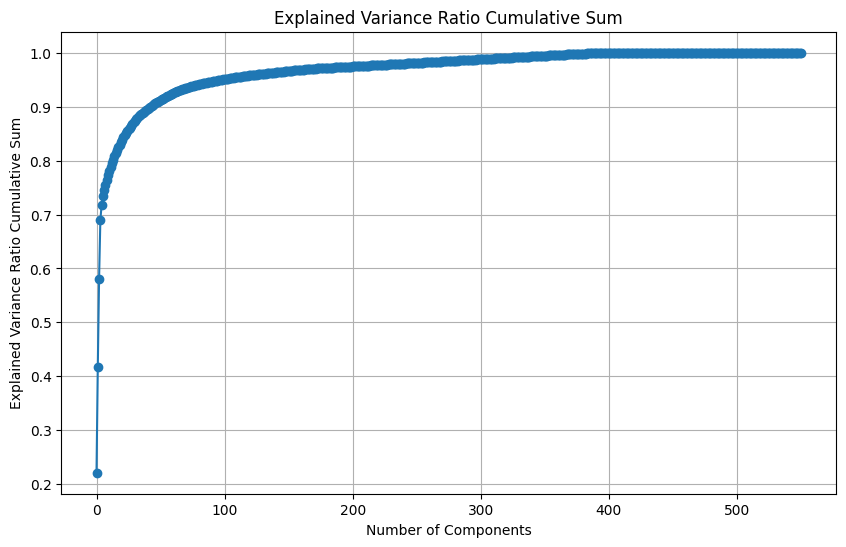

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(explained, marker='o', linestyle='-')
plt.title('Explained Variance Ratio Cumulative Sum')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio Cumulative Sum')
plt.grid(True)
plt.show()


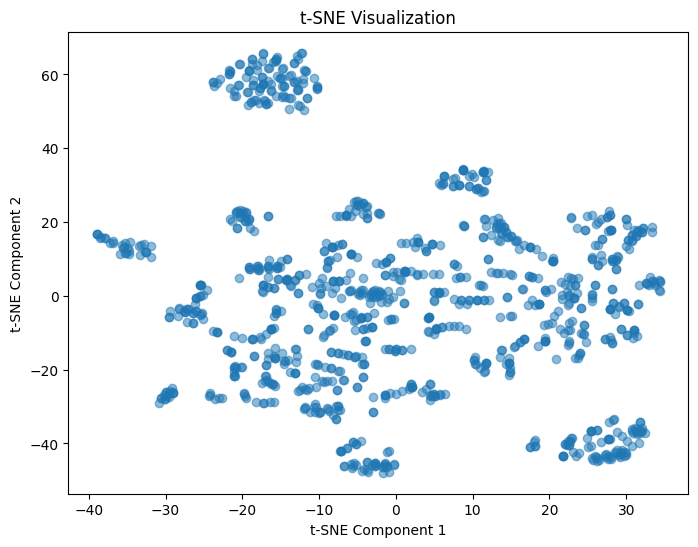

In [195]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(X_train, y_train)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

16. Кластеры представляют собой группу точек в пространстве данных, которые обладают похожими характеристиками или свойствами. В нашем случае выборка визуально разделяется на 3 кластера